# Guided Project: Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- <code>Rank</code> - Rank by median earnings (the dataset is ordered by this column).
- <code>Major_code</code> - Major code.
- <code>Major</code> - Major description.
- <code>Major_category</code> - Category of major.
- <code>Total</code> - Total number of people with major.
- <code>Sample_size</code> - Sample size (unweighted) of full-time.
- <code>Men</code> - Male graduates.
- <code>Women</code> - Female graduates.
- <code>ShareWomen</code></code> - Women as share of total.
- <code>Employed</code> - Number employed.
- <code>Median</code> - Median salary of full-time, year-round workers.
- <code>Low_wage_jobs</code> - Number in low-wage service jobs.
- <code>Full_time</code> - Number employed 35 hours or more.
- <code>Part_time</code> - Number employed less than 35 hours.

Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

raw_data_count = len(recent_grads)

recent_grads.info()

recent_grads

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


Cleaning out all missing values from the data.

In [3]:
recent_grads = recent_grads.dropna()

cleaned_data_count = len(recent_grads)

print("Removed {} rwo that had missing data".format(raw_data_count - cleaned_data_count))

Removed 1 rwo that had missing data


## Scatter Plotting and Some Questions

1. Do students in more popular majors make more money?
2. Do students that majored in subjects that were majority female make more money?
3. Is there any link between the number of full-time employees and median salary?

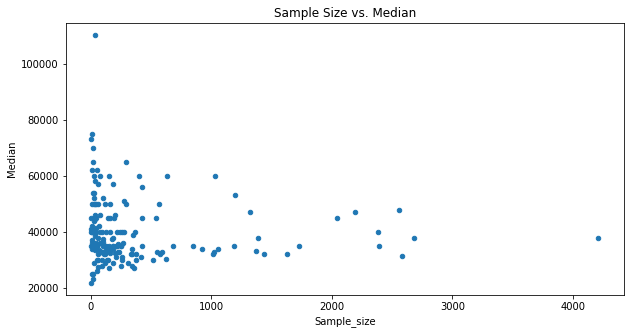

In [4]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', figsize=(10,5))
ax.set_title('Sample Size vs. Median')
plt.show()

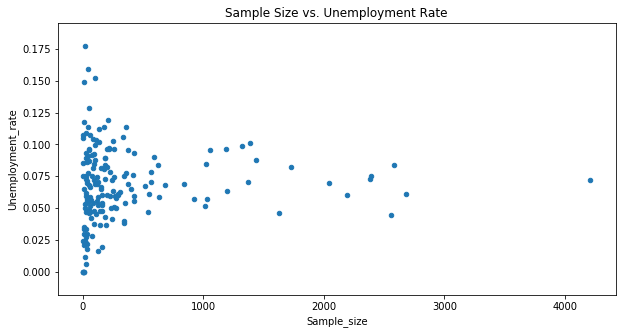

In [5]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', figsize=(10,5))
ax.set_title('Sample Size vs. Unemployment Rate')
plt.show()

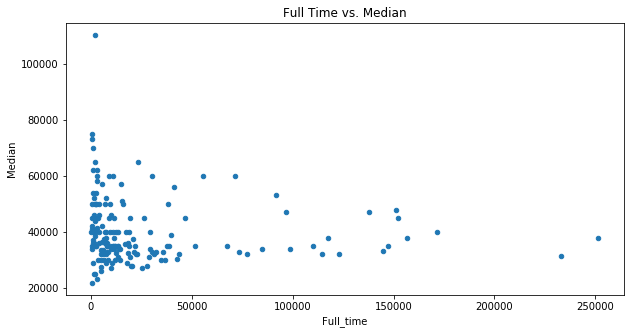

In [6]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter', figsize=(10,5))
ax.set_title('Full Time vs. Median')
plt.show()

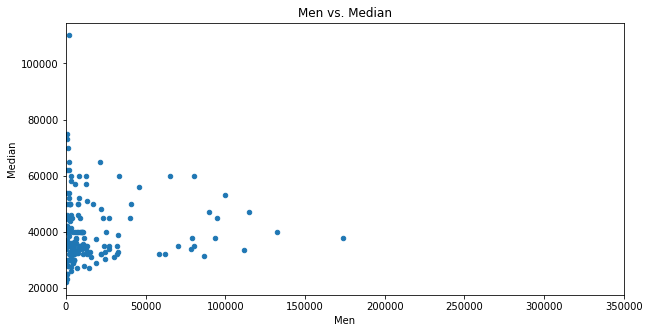

In [7]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter', figsize=(10,5))
ax.set_title('Men vs. Median')
ax.set_xlim(0,350000)
plt.show()

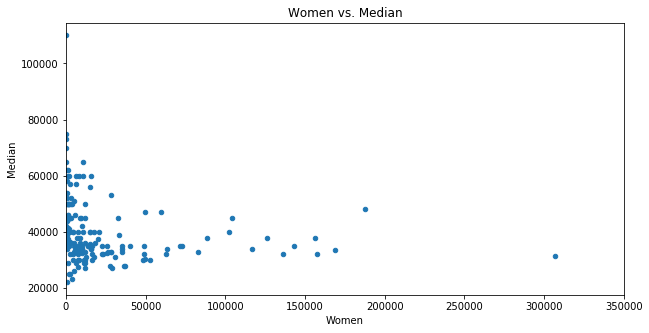

In [8]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter', figsize=(10,5))
ax.set_title('Women vs. Median')
ax.set_xlim(0,350000)
plt.show()

1. Do students in more popular majors make more money?<br>
Based on the "Sample Size vs. Median" graph above the majors that had more people sampled did not show an increase in median salory. If anything the median maintains as the increase in sample size goes up.
2. Do students that majored in subjects that were majority female make more money?<br>
Hard to say with only the graphs "Men vs. Median" and "Women vs. Median". It can be seen from the "Women vs. Median" that there are several majors with a large about of women (above 150000) that make less than the $50,000 median salary mark. While only one major has over 150000 men in that profession.
3. Is there any link between the number of full-time employees and median salary?<br>
Seems no correlation between the two.

## Histograms and Some Questions

Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
- Sample_size
- Median
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women


1. What percent of majors are predominantly male? Predominantly female?
2. What's the most common median salary range?

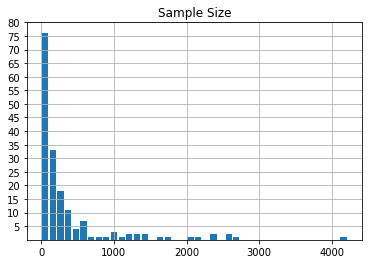

In [9]:
ax = recent_grads['Sample_size'].hist(bins=40, rwidth=0.8)
ax.set_yticks([x*5 + 5 for x in range(16)])
ax.set_title('Sample Size')
plt.show()

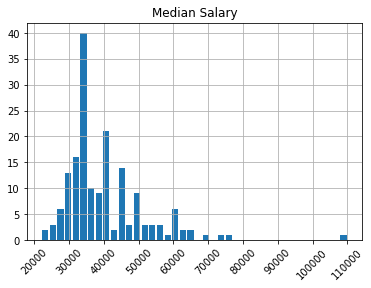

In [10]:
ax = recent_grads['Median'].hist(bins=40, rwidth=0.8)
ax.set_xticks([ x * 10000 + 20000 for x in range(10)])
plt.xticks(rotation=45)
ax.set_title('Median Salary')
plt.show()

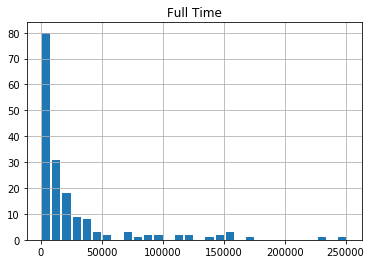

In [11]:
ax = recent_grads['Full_time'].hist(bins=30, rwidth=0.8)
ax.set_title('Full Time')
plt.show()

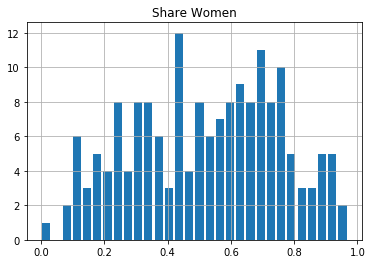

In [12]:
ax = recent_grads['ShareWomen'].hist(bins=30, rwidth=0.8)
ax.set_title('Share Women')
plt.show()

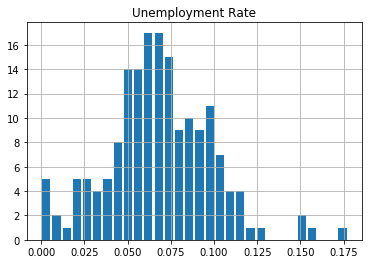

In [13]:
ax = recent_grads['Unemployment_rate'].hist(bins=30, rwidth=0.8)
ax.set_title('Unemployment Rate')
plt.show()

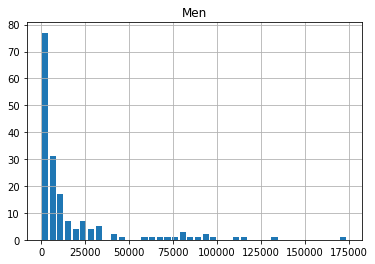

In [14]:
ax = recent_grads['Men'].hist(bins=40, rwidth=0.8)
ax.set_title('Men')
plt.show()

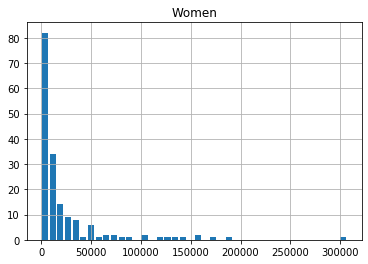

In [15]:
ax = recent_grads['Women'].hist(bins=40, rwidth=0.8)
ax.set_title('Women')
plt.show()

## Scatter Matrix Plots From Panadas

In [16]:
from pandas.plotting import scatter_matrix

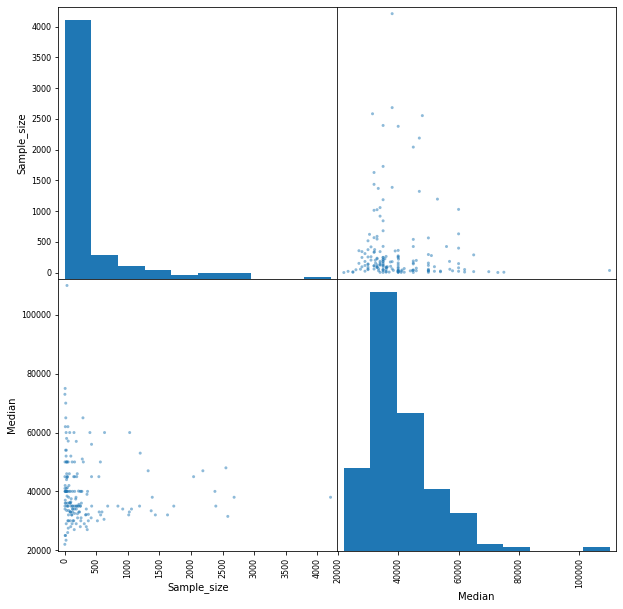

In [17]:
scatter_matrix(recent_grads[['Sample_size', 'Median']],figsize=(10,10))
plt.show()

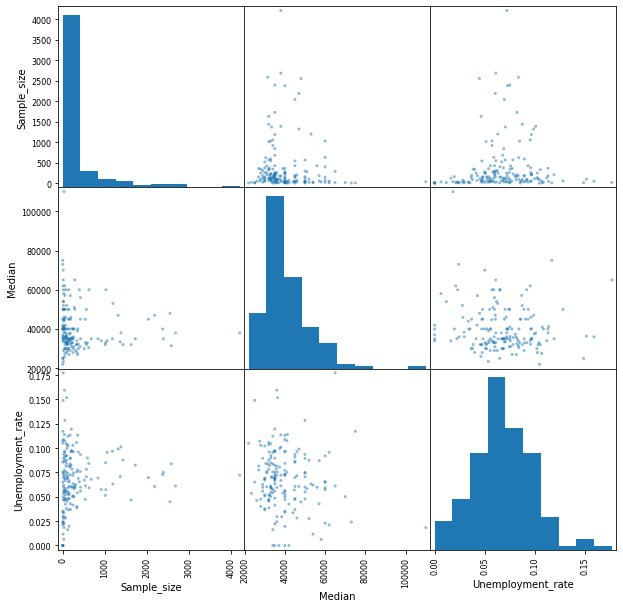

In [18]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']],figsize=(10,10))
plt.show()

## Bar Plots in Pandas

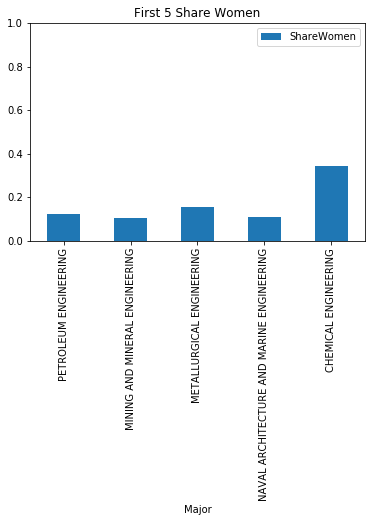

In [19]:
recent_grads.head().plot.bar(x='Major',y='ShareWomen')
plt.title("First 5 Share Women")
plt.ylim(0,1)
plt.show()

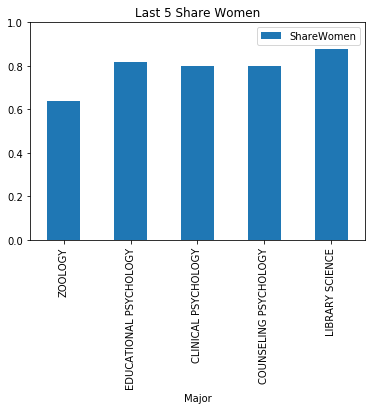

In [20]:
recent_grads.tail().plot.bar(x='Major',y='ShareWomen')
plt.title("Last 5 Share Women")
plt.ylim(0,1)
plt.show()

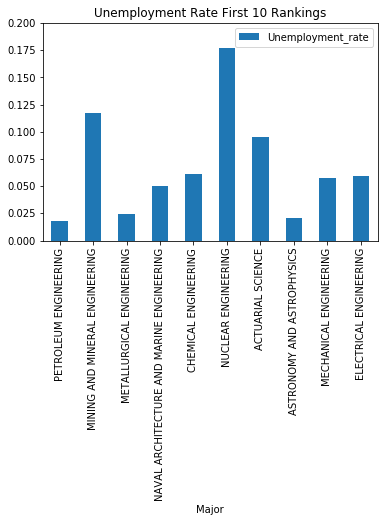

In [21]:
recent_grads.head(10).plot.bar(x='Major',y='Unemployment_rate')
plt.title('Unemployment Rate First 10 Rankings')
plt.ylim(0,.2)
plt.show()

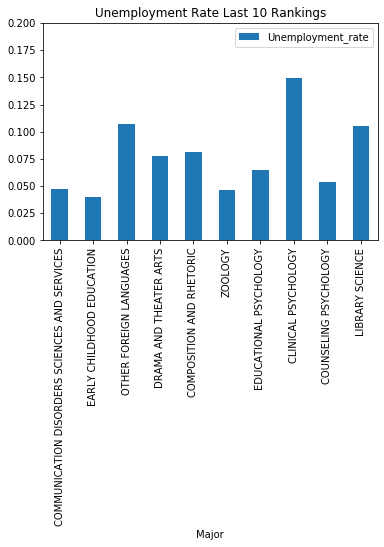

In [22]:
recent_grads.tail(10).plot.bar(x='Major',y='Unemployment_rate')
plt.title('Unemployment Rate Last 10 Rankings')
plt.ylim(0,.2)
plt.show()